In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageOps

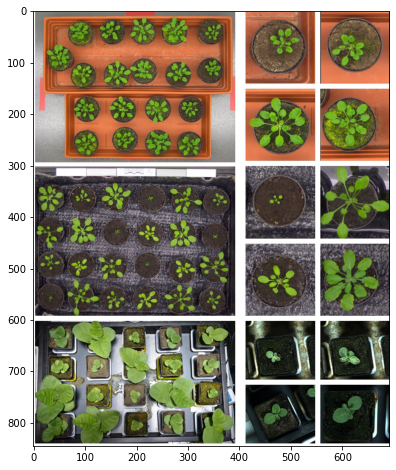

In [5]:
# Abrindo uma imagem

img = np.array(Image.open('images/exemplo1.jpg'))
_ = plt.figure(figsize=(8,8))
_ = plt.imshow(img)

In [14]:
# Detalhes da image

print(f"A imagem tem # dimensões: {img.ndim}")  # A imagem tem 3 dimensões pois é constituida de uma lista
                                                # de listas de listas. Isso pode ser compreendido da seguinte maneira:
                                                # Cada pixel é uma lista do tipo [R, G, B]. Cada linha é uma lista de pixels.
                                                # A imagem é uma lista das linhas.


print(f"A forma da imagem é: {img.shape}")
print(f"Dtype: {img.dtype}")
x = 10
y =10
print(f"Valor do pixel na posição ({x}, {y}): {img[x, x]}")   # Valor na escala [R, G, B]
print(f"O Valor mínimo de Vermelho (R) na imagem é: {img[:, :, 0].min()}")   # Dessa forma, obtemos um array com 2 dimensões.
                                                                             # A lista [R, G, B] foi substituída pelos valores 
                                                                             # vermelho. Depois, extraímos o mínimo.
                                                                    

A imagem tem # dimensões: 3
A forma da imagem é: (845, 692, 3)
Dtype: uint8
Valor do pixel na posição (10, 10): [127 126 122]
O Valor mínimo de Vermelho (R) na imagem é: 0


In [15]:
# Testando numpy arrays...

matriz = []
cont = 1
for i in range(0, 10):
    linha = []
    for j in range(0, 10):
        linha.append(cont)
        cont += 1
    matriz.append(linha)

teste = np.array(matriz)
print(teste)
print(teste.ndim)

[[  1   2   3   4   5   6   7   8   9  10]
 [ 11  12  13  14  15  16  17  18  19  20]
 [ 21  22  23  24  25  26  27  28  29  30]
 [ 31  32  33  34  35  36  37  38  39  40]
 [ 41  42  43  44  45  46  47  48  49  50]
 [ 51  52  53  54  55  56  57  58  59  60]
 [ 61  62  63  64  65  66  67  68  69  70]
 [ 71  72  73  74  75  76  77  78  79  80]
 [ 81  82  83  84  85  86  87  88  89  90]
 [ 91  92  93  94  95  96  97  98  99 100]]
2
